# Deep Convolutional Neural Networks: An Introduction to Image Classification

*Transforming and augmenting images to train deep convolutional neural networks*

## Table of contents
1. [Objective](#objective)
2. [Data Selection](#data)
3. [Kernals and Image Augmentation](#augment)
    <br> 3.1 [Required Packages](#3.1)
    <br> 3.2 [Sample Image Loading and Scaling](#3.2)
    <br> 3.3 [Image Sharpening](#3.3)
    <br> 3.4 [Image Blurring](#3.4)
    <br> 3.5 [Edge Detection](#3.5)
    <br> 3.6 [Combing Multiple Filters: Blurring then Sharpening](#3.6)
4. [Deep Convolutional Neural Network: Binary Sex Classification](#binary)
    <br> 4.1 [Setup](#4.1)
    <br> 4.2 [Loading Raw Images Local File Directory](#4.2)
    <br> 4.3 [Image Preprocessing](#4.3)
    <br> 4.4 [Create Train and Validation Set](#4.4)
    <br> 4.5 [Deep Convolutional Neural Network](#4.5)
    <br> 4.6 [Training the Model](#4.6)
5. [Deep Convolutional Neural Network: Multi Image Classification](multiclass)
    <br> 5.1 [Split Data Into Training and Testing](#5.1)
    <br> 5.2 [Visualizing the Data Set](#5.2)
    <br> 5.3 [Changing the Data to Work with the Model](#5.3)
    <br> 5.5 [Visualizing the Accuracy of the Model](#5.4)
    <br> 5.6 [Using the Model and Data Analysis](#5.5)
    <br> 5.7 [Functions created for next output visualization](#5.6)
    <br> 5.8 [Plotting Probabilities with Predicted and True Class](#5.7)
6. [Deep Convolutional Neural Network: Multi Image Classification Using Sharpened Images](#sharp)

## 1. Objective <a name="objective"></a>

This is an introduction to understanding image augmentation and convolutional neural networks. From this vignette, you will learn how to apply preset filters to extract image features (sharpen, blur, edge-detection); preprocess raw images (standardizing input); create and train deep convolutional neural networks (binary and mutli classification).

## 2. Data Selection  <a name="data"></a>

For our binary classification, we use the [Male and Female Faces Dataset](https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset). This dataset contains "2.7k pictures of Male and Female faces respectively, covering multiples ethnicities and age groups (12-13% data belongs old people in both the datasets)." We take subset of 800 faces in total for which we have 400 male faces and 400 females faces. The data can be found in the */data/faces* directory with the images organized into a folder with respect to its label.



## 3. Kernals and Image Augmentation  <a name="augment"></a>

Kernals are used to augment and transform images. Kernals are a matrix of weights. This matrix is then slid across the input image which results in the changed appearance. It is important to understand how kernals affect images as they are the core of convolution layers in CNNs.

### 3.1 Required Packages <a name="3.1"></a>

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 3.2 Sample Image Loading and Scaling <a name="3.2"></a>

Text(0.5, 0, 'Scaled Image')

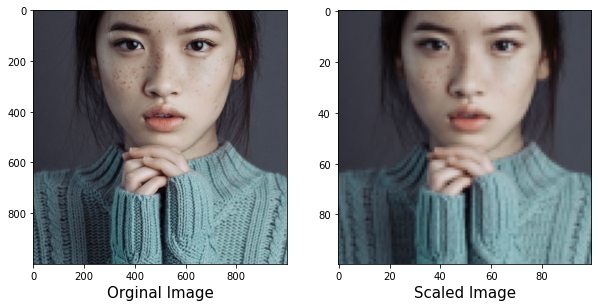

In [81]:
# get directory
wd = os.getcwd()
female_dir = wd + '/data/faces/female'
img_name = '/0 (487).jpg'

# open image
img = Image.open(female_dir + '/' + img_name)
img = np.array(img)
plt.rcParams["figure.figsize"] = [10, 10]
plt.subplot(1,2,1)
plt.imshow(img)
plt.xlabel("Orginal Image", fontsize=15)

# resize image
img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)
plt.subplot(1,2,2)
plt.imshow(img)
plt.xlabel("Scaled Image", fontsize=15)

### 3.3 Image Sharpening <a name="3.3"></a>

Text(0.5, 0, 'Image Sharpened')

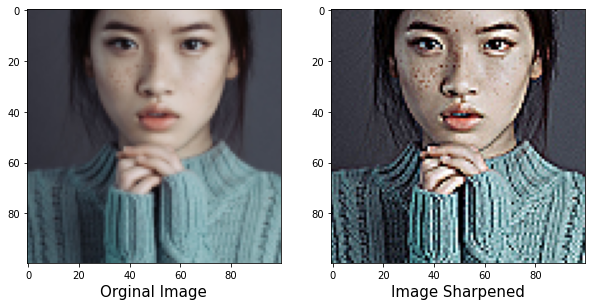

In [82]:
#kernel for sharpening image
kernel = np.array([[0, -1, 0], 
                   [-1, 5,-1],
                   [0, -1, 0]])
img_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

# plot images
plt.subplot(1,2,1)
plt.imshow(img)
plt.xlabel("Scaled Image", fontsize=15)
plt.subplot(1,2,2)
plt.imshow(img_sharp)
plt.xlabel("Image Sharpened", fontsize=15)


### 3.4 Image Blurring <a name="3.4"></a>

Text(0.5, 0, 'Image Blurred')

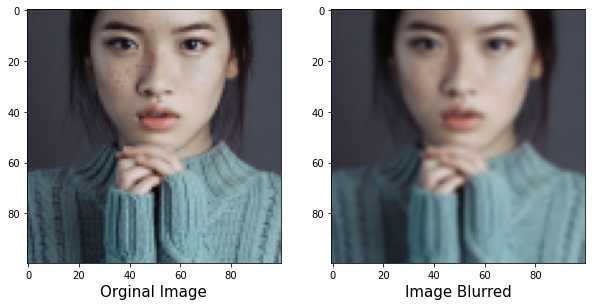

In [83]:
# image blur
img_blur = cv2.GaussianBlur(img, (3,3), 0)

# plot images
plt.subplot(1,2,1)
plt.imshow(img)
plt.xlabel("Scaled Image", fontsize=15)
plt.subplot(1,2,2)
plt.imshow(img_blur)
plt.xlabel("Image Blurred", fontsize=15)

### 3.5 Edge Detection <a name="3.5"></a>
NOTE: Blurring (smoothing) before edge detection is crucial to remove noise that may cause false edges. The image inputted is not the original image but rather the blurred image from the previous cell. 

Text(0.5, 0, 'Edge Detection')

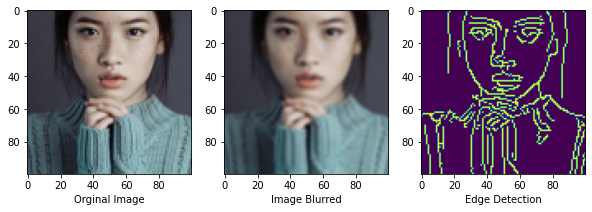

In [84]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=150) 

# plot images
plt.subplot(1,3,1)
plt.imshow(img)
plt.xlabel("Scaled Image", fontsize=10)
plt.subplot(1,3,2)
plt.imshow(img_blur)
plt.xlabel("Image Blurred", fontsize=10)
plt.subplot(1,3,3)
plt.imshow(edges)
plt.xlabel("Edge Detection", fontsize=10)

### 3.6 Combing Multiple Filters: Blurring then Sharpening <a name="3.6"></a>

Text(0.5, 0, 'Image Blurred + Sharpened')

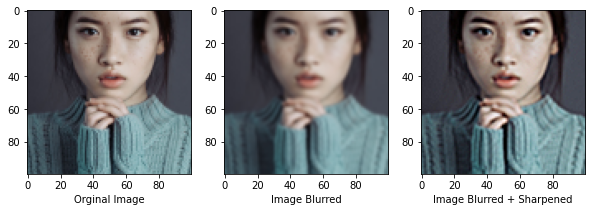

In [85]:
# blur then sharpen
image_sharp_with_blur = cv2.filter2D(src=img_blur, ddepth=-1, kernel=kernel)

# plot images
plt.subplot(1,3,1)
plt.imshow(img)
plt.xlabel("Orginal Image", fontsize=10)
plt.subplot(1,3,2)
plt.imshow(img_blur)
plt.xlabel("Image Blurred", fontsize=10)
plt.subplot(1,3,3)
plt.imshow(image_sharp_with_blur)
plt.xlabel("Image Blurred + Sharpened", fontsize=10)

## 4. Deep Convolutional Neural Network: Binary Sex Classification <a name="binary"></a>

**Objectives:** read-in raw images from a local directory; perform image preprocessing to ensure proper input format; create and train an 8-layer Deep Convolutional Neural Network; use the Functional API of *keras* to extract features of convolutional layers.

### 4.1 Setup <a name="4.1"></a>

Required Packages:

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os

Check Package Versions

In [ ]:
print('PIL', Image.__version__)
print('NumPy', np.__version__)
print('tensorflow', tf.__version__)
print('keras', keras.__version__)

PIL 9.2.0
NumPy 1.23.5
tensorflow 2.10.0
keras 2.10.0


### 4.2 Loading Raw Images Local File Directory <a name="4.2"></a>

The raw images are stored in the */data/faces* directory and is categorized by female or male in the */female* and */male* subdirectories respectively. This code will get the path names to the female and male directories.

In [87]:
wd = os.getcwd()
female_dir = wd + '/data/faces/female'
male_dir = wd + '/data/faces/male'
female_file_names = os.listdir(female_dir)
male_file_names = os.listdir(male_dir)

The **Image** module of **PIL** will allow us to open the images as a JPEG file. We can plot the first 6 images of */female* and */male* using the **pyplot** module of **matplotlib**. 

Here's the first 6 images of the **/female** directory.

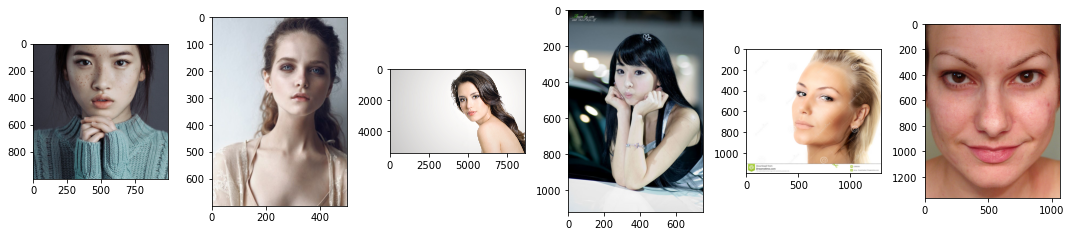

In [88]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
for i in range(6):
    plt.subplot(1, 6, i + 1)
    img = Image.open(female_dir + '/' + female_file_names[i])
    plt.imshow(img)
plt.show()


Here's the first 6 images of the **/male** directory.

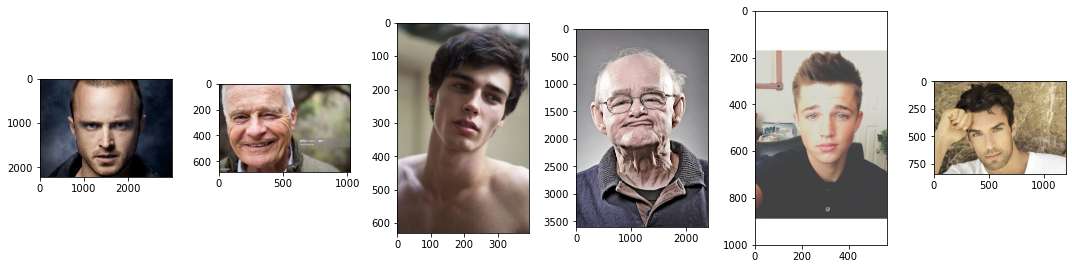

In [ ]:
for i in range(6):
    plt.subplot(1, 6, i + 1)
    img = Image.open(male_dir + '/' + male_file_names[i])
    plt.imshow(img)
plt.show()

**Note that the dimensions of each image are all different.**

This will cause issues when we try to input them into our neural network. In the next section, we will go over about how we approach standardizing the image dimensions so that they can be used as input for our neural network. 

### 4.3 Image Preprocessing <a name="4.3"></a>

In the last section, we found that the images were all of different dimensions. Our goal in this section will be to set all the dimension of each image to the same size and convert the image objects to tensors that can be read by our neural network.

In [ ]:
image_data = []
image_size = 224
for image_name in female_file_names:
    # turn jpeg into tensor
    image = tf.image.decode_jpeg(tf.io.read_file(female_dir + '/' + image_name), channels = 3)
    # resize and crop with padding to 255 black where its padded
    image = tf.cast(tf.image.resize_with_pad(image,image_size,image_size),dtype = tf.uint8)
    # add to data
    image_data.append(image)

for image_name in male_file_names:
    image = tf.image.decode_jpeg(tf.io.read_file(male_dir + '/' + image_name), channels = 3)
    image = tf.cast(tf.image.resize_with_pad(image,image_size,image_size),dtype = tf.uint8)
    image_data.append(image)


We can use same the code from above to plot the images. Let's see the results of out the image transformations.

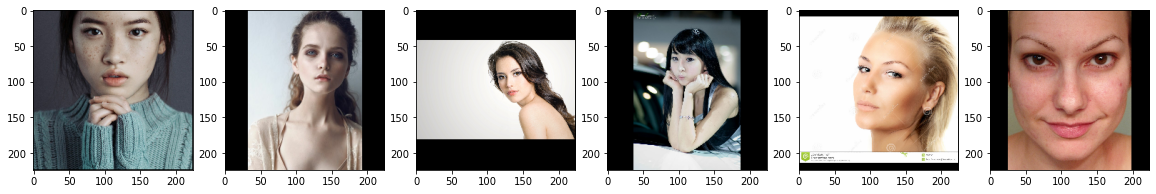

In [ ]:
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(image_data[i])
plt.show()

As you can see, all the images are now the same size tensors with dimensions 224 x 224 x 3. Note how the tensors have 3 dimensions. This is because we set *channels = 3* inside of the *tf.image.decode_jpeg()* function. This causes the image to be split by RGB values. Let's plot each of RGB matrices respectively for the first image.

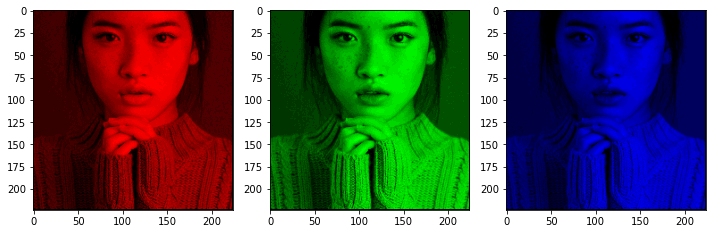

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
r = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
g = [(0, 0, 0), (0, 1, 0)]
b = [(0, 0, 0), (0, 0, 1)]
colors= [r, g, b]

for i in range(3):
    cm= LinearSegmentedColormap.from_list(
        "Custom", colors[i], N=20)
    plt.subplot(1, 3, i+1)
    plt.imshow(image_data[0][:, :, i], cmap=cm)
plt.show()

Now our image data has been transformad to a 3-dimensional tensor. In short, 3 of the these 2-dimensional matrices (RGB) are stacked on top of each other which creates an RGB image.

Now our raw images have been processed and are ready to be input into a neural network.

### 4.4 Create Train and Validation Set <a name="4.4"></a>

Before we create our mdoel, we will first partition our data into a training and test set. The *scikit-learn* package contains a useful function called *train_test_split()* that we can use to easily partition our data.

The code below will partition our entire data set of 800 classified observations into our training and test set. We will randomly set aside 0.2 of our data to use for testing, and the rest will be used for training. 

In [ ]:
from sklearn.model_selection import train_test_split

images_np = np.array(image_data)

labels = np.array([0] * len(female_file_names) + [1] * len(male_file_names))
labels_np = np.array(labels)

images_train, images_test, labels_train, labels_test = train_test_split(images_np, labels_np, test_size = 0.2, random_state=1)

images_train = tf.convert_to_tensor(images_train)
images_test = tf.convert_to_tensor(images_test)
labels_train = tf.convert_to_tensor(labels_train, dtype_hint=tf.uint8)
labels_test = tf.convert_to_tensor(labels_test, dtype_hint=tf.uint8)

It is important to note that you must specify the data type of your tensors in the *'dtype_hint ='* parameter when converting your list of labels to a tensor. Not specifying data types may lead to errors when training and evaluating your neural network.

### 4.5 Deep Convolutional Neural Network <a name="4.5"></a>

Now that our data is ready, let's create our model! Our model architecture is inspired by the AlexNet Deep Convolutional Neural Network. The AlexNet CNN features 8-layers with 5 convolutional layers and 3 dense layers. To read more about this model refer to *Section 3.5: Overall Architecture* in the research paper linked below. That section will cover the kernals, kernal sizes, pooling layers, normalization layers, activation functions, dense layer nodes, dropout, and activation functions. 

One limitation that we must be accounted for was the massize number of the parameters the AlexNet CNN has. ***It has 60 million.*** In 2010, when this model was trained on 2 GPUs, it took 6 days.

As noted, we take inspiration from this model and use the same layer pipeline; however, we reduce the number of filters in each convolutional layer and the number of nodes in the dense layers. This reduces the number of parameters from 60 million to ~600 thousand. This number is better fit for us as it will train significantly faster.

https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf


In [ ]:
from keras import layers

model = keras.Sequential(
    [
        # 1st Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=(11,11), strides=(4,4), activation='relu', padding='same', input_shape=(224, 224, 3)),
        # Max-Pooling
        layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
        # Batch Normalization
        layers.BatchNormalization(),

        # 2nd Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'),
        # Max-Pooling
        layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
        # Batch Normalization
        layers.BatchNormalization(),

        # 3nd Convolutional Layer
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),

        # 4th Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),

        # 5th Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),

        # Flattening
        layers.Flatten(),

        # 1st Dense Layer
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),

        # 2nd Dense Layer
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),

        # 3rd Dense (Output) Layer
        layers.Dense(2, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 56, 56, 32)        11648     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_76 (Conv2D)          (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                     

Now that we have created our CNN, let's compile it with the adam optimizer.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### 4.6 Training the Model <a name="4.6"></a>

To train our model, we use the *.fit()* method and input our training data that we partitioned. We'll run it for 40 epochs and assign our test data to *'validation_data'=* so that we can measure the test accuracy of our model.

In [ ]:
hist = model.fit(x = images_train,
                 y = labels_train,
                 epochs=40, 
                 validation_data=(images_test, labels_test), 
                 shuffle = True)

Epoch 1/40
20/20 [==============================] - 5s 88ms/step - loss: 0.7307 - accuracy: 0.5500 - val_loss: 0.6456 - val_accuracy: 0.6375
Epoch 2/40
20/20 [==============================] - 1s 53ms/step - loss: 0.6788 - accuracy: 0.6047 - val_loss: 0.6482 - val_accuracy: 0.6813
Epoch 3/40
20/20 [==============================] - 1s 34ms/step - loss: 0.6377 - accuracy: 0.6188 - val_loss: 0.6377 - val_accuracy: 0.6562
Epoch 4/40
20/20 [==============================] - 1s 33ms/step - loss: 0.6297 - accuracy: 0.6578 - val_loss: 0.6861 - val_accuracy: 0.5688
Epoch 5/40
20/20 [==============================] - 1s 32ms/step - loss: 0.6199 - accuracy: 0.6438 - val_loss: 0.6494 - val_accuracy: 0.5813
Epoch 6/40
20/20 [==============================] - 1s 32ms/step - loss: 0.5670 - accuracy: 0.6984 - val_loss: 0.6357 - val_accuracy: 0.6500
Epoch 7/40
20/20 [==============================] - 1s 32ms/step - loss: 0.5334 - accuracy: 0.7281 - val_loss: 0.6116 - val_accuracy: 0.6375
Epoch 8/40
20

Now that we have trained the model we can plot the history of model to show the Test Loss and Test Accuracy over the 40 epochs it was trained over.

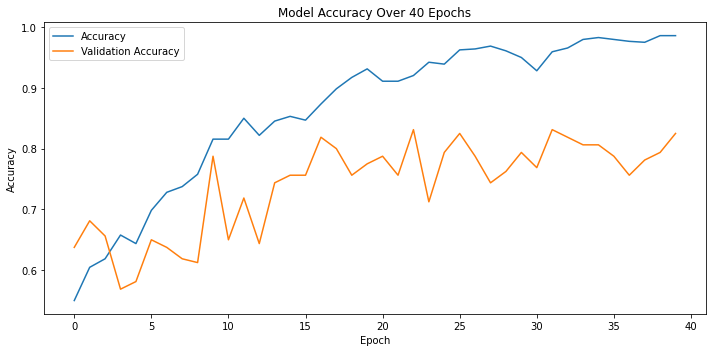

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy Over 40 Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

In [ ]:
test_scores = model.evaluate(y = labels_test, 
                             x = images_test, 
                             verbose=2)
                             
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

5/5 - 0s - loss: 0.9366 - accuracy: 0.8250 - 323ms/epoch - 65ms/step
Test loss: 0.9365582466125488
Test accuracy: 0.824999988079071


### 4.7 Feature Extraction <a name="4.7"></a>

This section will cover how you can extract the features of each convolutional layer.

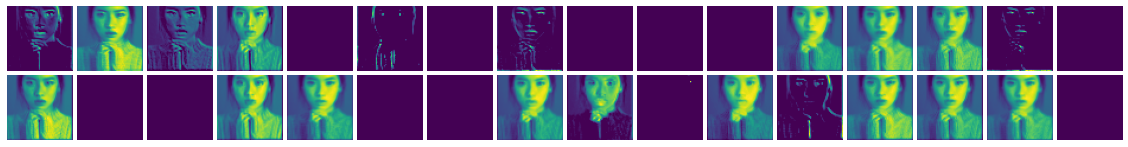

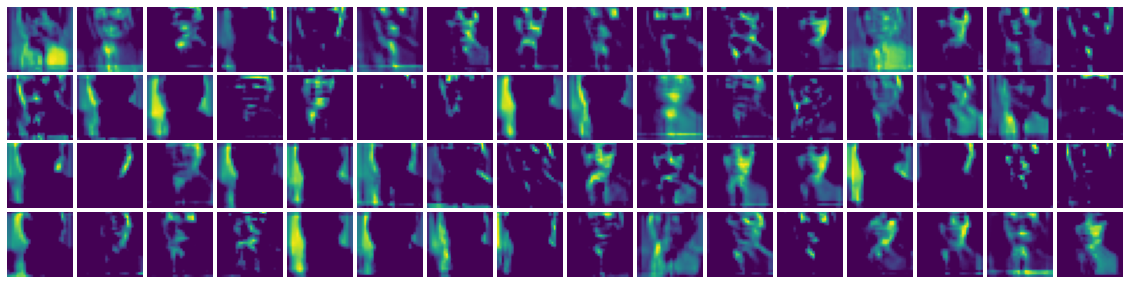

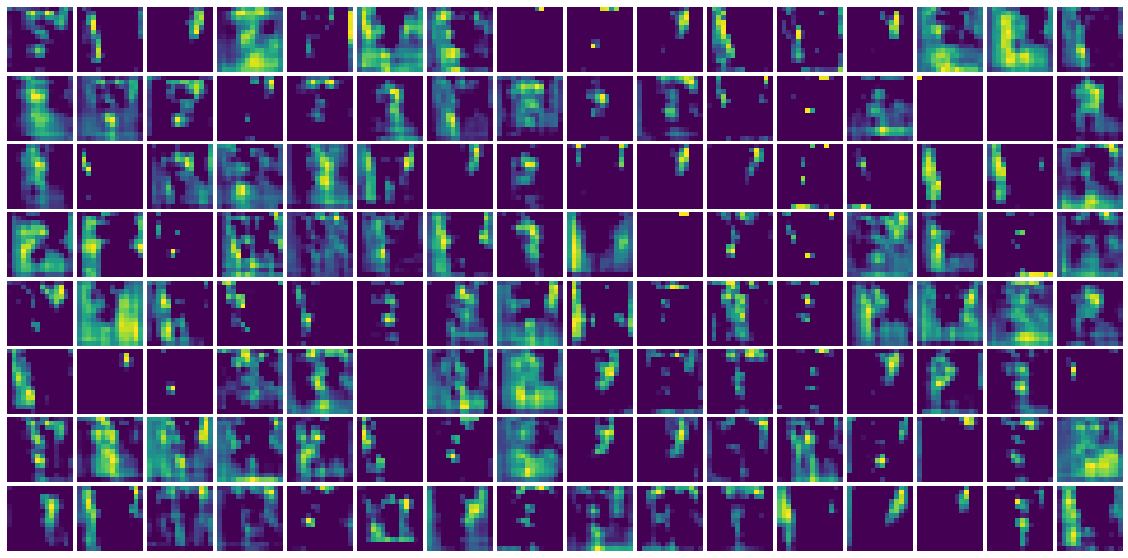

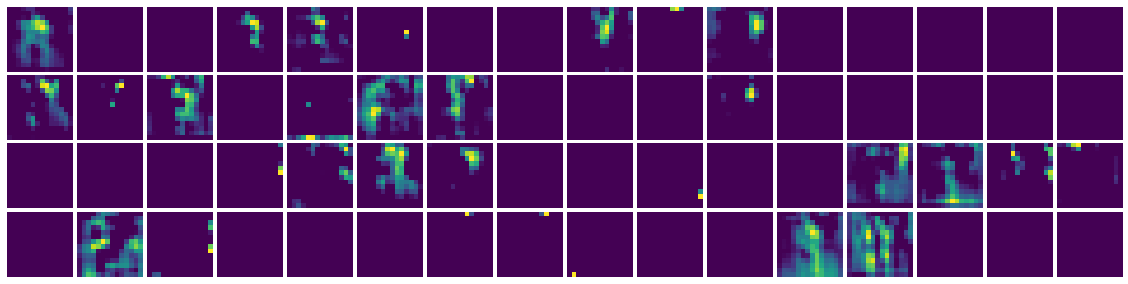

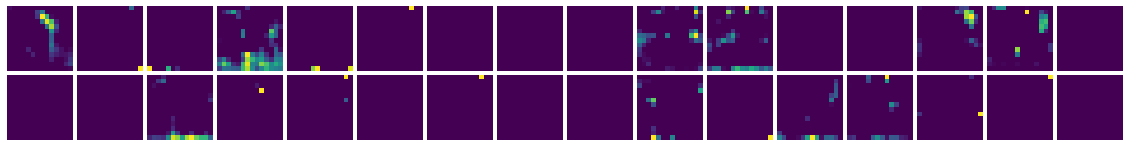

In [ ]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=[layer.output for layer in model.layers],
)

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = False

image = tf.constant(image_data[0], shape = (1, 224, 224, 3))
features = feature_extractor(image)

for i in [0, 3, 6, 7, 8]:
    feature = features[i]
    for j in range(len(feature[0, 0, 0])):
        plt.subplot(8, 16,  j+1)
        plt.imshow(feature[0, :, :, j])
        plt.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

After performing feature extraction on our model, we are able to view how the filter of a convolutional layer in the CNN processes our input image. These images show the output of each of the 5 convolutional layers in sequential order. As you can see, the image output is nearly indecipherable by the time it reaches the 5th convolutional layer. At this time, it is then flattened into a vector and is passed through dense layers.

Taking a look at the first convolutional layer, we can see that some kernals are performing edge detection in some of the images for example the image in row 2 column 12.

## 5. Deep Convolutional Neural Network: Multi Image Classification <a name="multiclass"></a>

### 5.1 Split Data Into Training and Testing <a name="5.1"></a>

In [14]:
import keras
from keras.datasets import cifar10
from keras import Sequential, layers
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Checking the number of rows (records) and columns (features)
print('train_images shape:', train_images.shape)
print('train_labels shape:',train_labels.shape)
print('test_images shape:', test_images.shape)
print('test_labels shape:', test_labels.shape)

In [103]:
# Checking the labels
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### 5.2 Visualizing the Data Set <a name="5.2"></a>

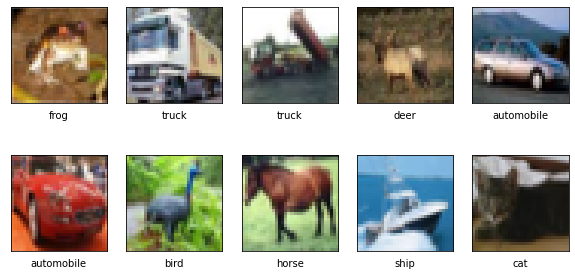

In [104]:
# Class Labels 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Visualizing some of the images from the training dataset

plt.figure(figsize=[10,5])
for i in range (10):    # for first 10 images
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

### 5.3 Changing the Data to Work with the Model <a name="5.3"></a>
Since images are read in as matrices, where each value is a pixel, we want to standardize the pixels and make sure they are float type.

In [ ]:
# Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.
# converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
# using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### 5.4 Creating the CNN and Training the Model <a name="5.4"></a>
The essence of CNN:
1. Add a convultion layer that detects and extracts multiple patterns/features from the image
2. Add a pooling layer that reduces the size of the feature map. We used max pooling which takes the largest element from the feature map created from the Conv2D layer. This prevents overfitting.
3. Repeat step 1 and 2 multiple times
4. Dropout Layer: drops neurons from the neural network (in this case 50%). This improves the performance of the model and prevents overfitting by simplifying the NN.
5. Flatten : The input image is flattend and fed to the Fully Connected Layet (connection from the convolution to the dense layer).
6. Dense: Used for the output layer, softmax gives a probability for each class. The model makes it prediction based on the class with highest probability. 

In [ ]:
#CNN Coding and Building the Layers

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

# Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
# Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
# Metrics used for evaluation - Accuracy.

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [114]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=14,
                    validation_data=(test_images, test_labels))

Epoch 1/14
782/782 [==============================] - 51s 62ms/step - loss: 1.8048 - accuracy: 0.3337 - val_loss: 1.6492 - val_accuracy: 0.4537
Epoch 2/14
782/782 [==============================] - 41s 53ms/step - loss: 1.2616 - accuracy: 0.5457 - val_loss: 1.0692 - val_accuracy: 0.6145
Epoch 3/14
782/782 [==============================] - 42s 53ms/step - loss: 1.0689 - accuracy: 0.6182 - val_loss: 0.9543 - val_accuracy: 0.6577
Epoch 4/14
782/782 [==============================] - 42s 54ms/step - loss: 0.9554 - accuracy: 0.6607 - val_loss: 0.8907 - val_accuracy: 0.6749
Epoch 5/14
782/782 [==============================] - 38s 49ms/step - loss: 0.8752 - accuracy: 0.6929 - val_loss: 0.9863 - val_accuracy: 0.6590
Epoch 6/14
782/782 [==============================] - 38s 49ms/step - loss: 0.8121 - accuracy: 0.7169 - val_loss: 0.8281 - val_accuracy: 0.7169
Epoch 7/14
782/782 [==============================] - 38s 49ms/step - loss: 0.7586 - accuracy: 0.7365 - val_loss: 0.7409 - val_accuracy:

### 5.5 Visualizing the Accuracy of the Model <a name="5.5"></a>

Text(0.5, 1.0, 'Accuracy Curves')

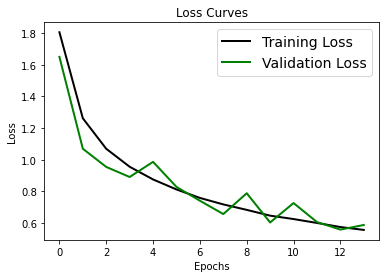

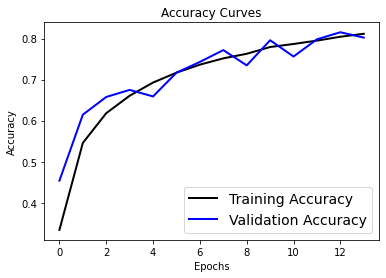

In [115]:
# Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.
# Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)


# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### 5.6 Using the Model and Data Analysis <a name="5.6"></a>

313/313 [==============================] - 2s 5ms/step


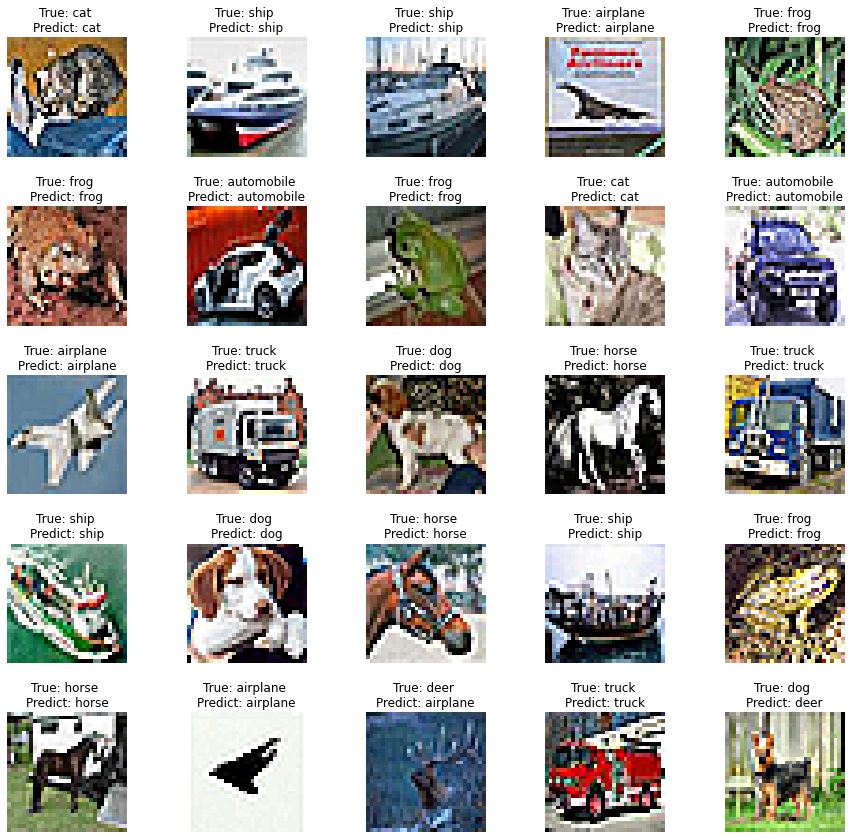

In [110]:
# Making the Predictions
pred = model.predict(test_images)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)


fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

After experimenting with the data we found that the accuracy of the models were pretty similar regardless of the filters. Our final result was 83% accuracy on the test data. I think a way for us to increase this accuracy is to create another model that depixelates the images and then use that on our CNN.

### 5.7 Functions created for next output visualization <a name="5.7"></a>

In [65]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[:][i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({class_names[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(np.argmax(true_label[:][i]))
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 5.8 Plotting Probabilities with Predicted and True Class <a name="5.8"></a>
The X-Axis Values correspond to the following 10 classes:

0 = airplane,
1 = automobile,
2 = bird,
3 = cat,
4 = deer,
5 = dog,
6 = frog,
7 = horse,
8 = ship,
9 = truck


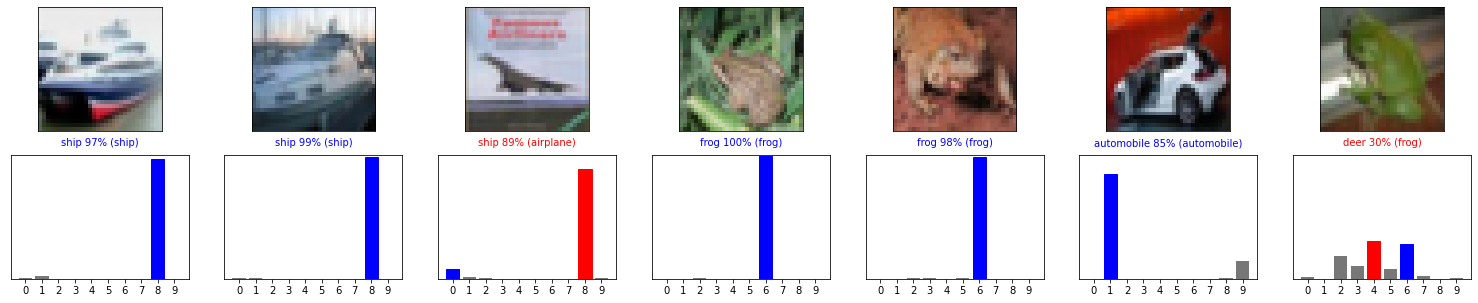

In [84]:
num_rows = 8
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(30, 5))
for i in range(1,8):
    plt.subplot(2, 8, i)
    plot_image(i, pred[i], test_labels, test_images)
    plt.subplot(2, 8, i + 8)
    plot_value_array(i, pred[i], test_labels)

#plt.tight_layout()

## 6. Deep Convolutional Neural Network: Multi Image Classification Using Sharpened Images<a name="sharp"></a>

Let's try the same architecture; however, this time we will perform image sharpening on the train and test set before inputng it into the model.

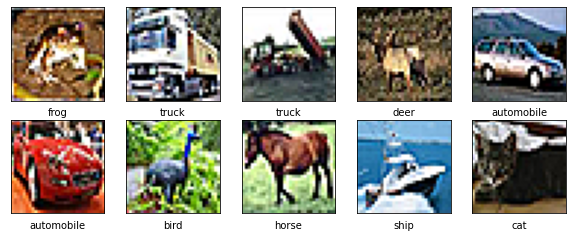

In [106]:
import cv2

kernel = np.array([[0, -1, 0], 
                   [-1, 5,-1],
                   [0, -1, 0]])

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

for i in range(len(train_images)):
    image_sharp = cv2.filter2D(src=train_images[i], ddepth=-1, kernel=kernel)
    train_images[i] = image_sharp
    
for i in range(len(test_images)):
    image_sharp = cv2.filter2D(src=test_images[i], ddepth=-1, kernel=kernel)
    test_images[i] = image_sharp

# Class Labels 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Visualizing some of the images from the training dataset


plt.figure(figsize=[10,10])
for i in range (10):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[int(train_labels[i])])

plt.show()

In [ ]:
# Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.
# converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
# using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.


train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [108]:
#CNN Coding and Building the Layers

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()


# Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
# Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
# Metrics used for evaluation - Accuracy.


model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=14,
                    validation_data=(test_images, test_labels))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_47 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_48 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

Text(0.5, 1.0, 'Accuracy Curves')

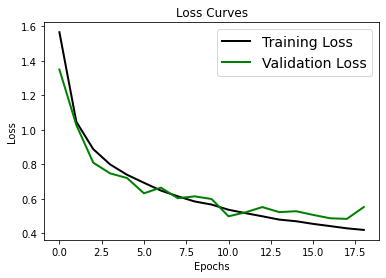

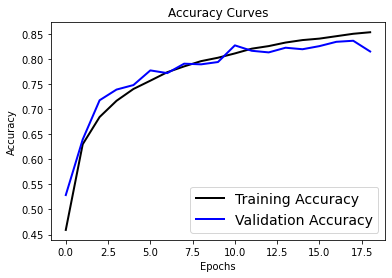

In [112]:
# Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.
# Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)


# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

313/313 [==============================] - 1s 4ms/step


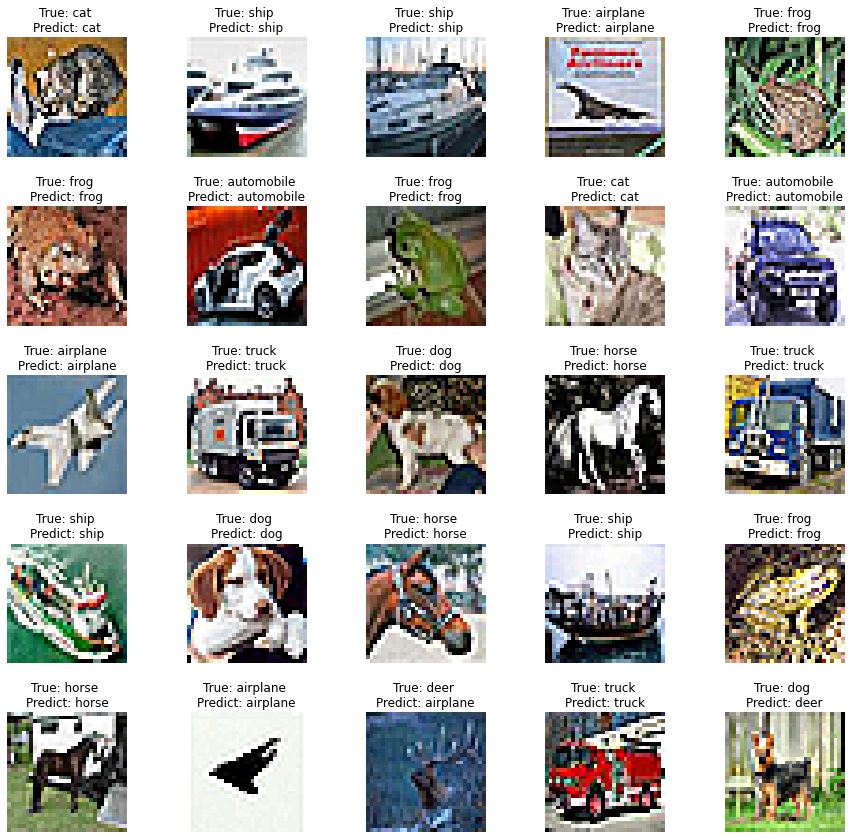

In [111]:
# Making the Predictions
pred = model.predict(test_images)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)


fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

As you can see the CNN using the original images had and test accuracy of 0.8023 while the augmented images had a test accuracy of 0.8131